In [63]:
import serial
import serial.tools.list_ports
import struct
import math
import numpy as np
import matplotlib.pyplot as plt
import time

In [64]:
def read_number(msg):
    while True:
        try:
            #return 2;
            return int(input(msg))
        except: print("ERROR: Not a number")

def read_port(msg):
    while True:
        try:
            port = input(msg)
            #port = "COM8";
            return serial.Serial(port, 9600)
        except: print(f"ERROR: Wrong port connection ({port})")
            
def getDevices():
    #num_devices = read_number("Number of devices: ")
    # num_devices = 2

    available_ports = serial.tools.list_ports.comports()

    print("Available ports:")
    for available_port in available_ports: print(available_port)
    return serial.Serial("/dev/cu.usbmodem1101", 9600)


In [65]:
devices = getDevices()
arduino = devices

Available ports:
/dev/cu.wlan-debug - n/a
/dev/cu.usbmodem1101 - Envie M7


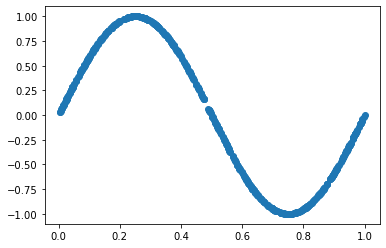

In [66]:
np.random.seed(42)
X = np.random.uniform(0.0,1.0,(600,))
y = np.sin(2*X * math.pi)

plt.scatter(X, y)
losses = []

In [67]:
epochs = 100
for epoch in range(epochs):
    error = 0.0
    dts = 0
    for i in range(600):
        arduino.write(b"t")
        arduino.write(struct.pack('f', X[i]))
        arduino.write(struct.pack('f', y[i]))
        dt = arduino.read(4)
        [dt] = struct.unpack('i', dt)
        n_error = arduino.read(4)
        [loss] = struct.unpack('f', n_error)
        error += loss
        dts += dt
    if epoch%10 == 0:
        print(f"{epoch}/{epochs} => {error/600.0}, {dt}ms")
    losses.append(error / 600.0)


0/100 => 0.006340058133893916, 354ms
10/100 => 0.00544748150815046, 348ms
20/100 => 0.0047395883085448055, 349ms
30/100 => 0.004164646877533803, 359ms
40/100 => 0.003682659465189471, 349ms
50/100 => 0.003267761798553069, 350ms
60/100 => 0.002904829612770866, 344ms
70/100 => 0.0025860582811294878, 347ms
80/100 => 0.0023078344994538085, 346ms
90/100 => 0.0020668526178760946, 355ms


In [ ]:
plt.plot(loss)

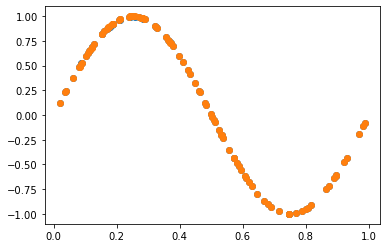

In [367]:
y_preds = []
X_test = np.random.uniform(0.0,1.0,(100,))
y_test = np.sin(2*X_test * math.pi)
for i in range(100):
    arduino.write(b"p")
    arduino.write(struct.pack('f', X_test[i]))
    n_error = arduino.read(4)
    [y_pred] = struct.unpack('f', n_error)
    y_preds.append(y_pred)

plt.scatter(X_test, y_preds)
plt.scatter(X_test, y_test)